#Problem 1: SSIM Index

In [ ]:
import numpy
import matplotlib.pyplot
import cv2

In [ ]:
from google.colab.patches import cv2_imshow

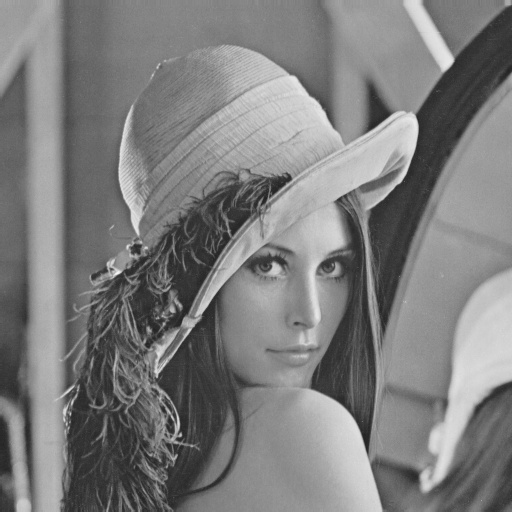

In [ ]:
# Loading the image for making it noisy image
Original_image = cv2.imread("/content/drive/MyDrive/D22180_HW_3/lena.jpg")
cv2_imshow(Original_image)

#Noisy Image Process

In [ ]:
def add_gaussian_noise(Original_image,sigma ):
    I = numpy.copy(Original_image).astype(float)
    G = numpy.random.normal(0, sigma, numpy.shape(I))
    N_I = I + G #N_I=Noisy image
    N_I = numpy.round( N_I)
    N_I[numpy.where(I<0)] = 0
    N_I[numpy.where(I>255)] = 255
    N_I = numpy.uint8( N_I)
    return  N_I

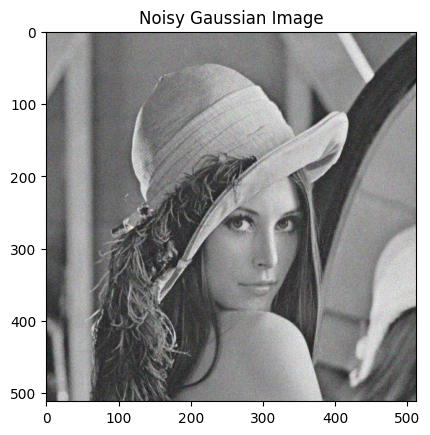

In [ ]:
Noisy_I = add_gaussian_noise(Original_image, 10)
matplotlib.pyplot.imshow(Noisy_I , cmap='gray')
matplotlib.pyplot.title('Noisy Gaussian Image')
matplotlib.pyplot.show()

#Blur Image

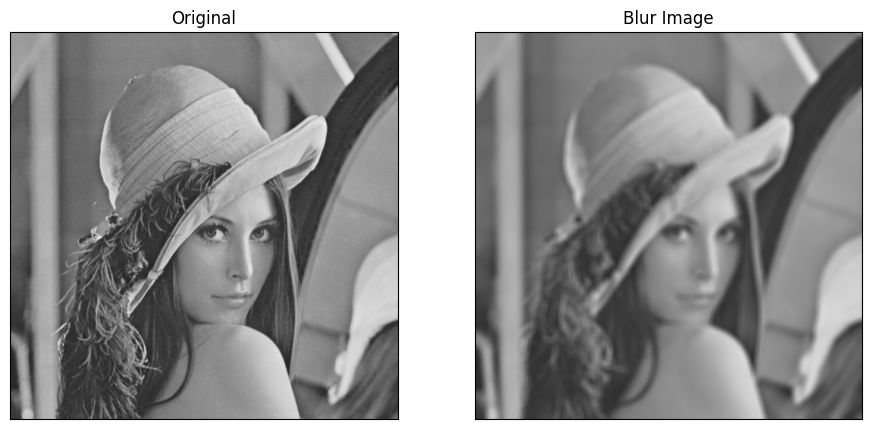

In [ ]:
figure_size = 9
Blur_img = cv2.blur(Original_image,(figure_size, figure_size))
matplotlib.pyplot.figure(figsize=(11,6))
matplotlib.pyplot.subplot(121), matplotlib.pyplot.imshow(Original_image, cmap='gray' ),matplotlib.pyplot.title('Original')
matplotlib.pyplot.xticks([]), matplotlib.pyplot.yticks([])
matplotlib.pyplot.subplot(122), matplotlib.pyplot.imshow(Blur_img,cmap='gray'),matplotlib.pyplot.title('Blur Image')
matplotlib.pyplot.xticks([]), matplotlib.pyplot.yticks([])
matplotlib.pyplot.show()

#Compressed Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from PIL import Image
import PIL
import os


In [ ]:
a = 360
Original_I = Image.open('/content/drive/MyDrive/D22180_HW_3/lena.jpg')
b = (a / float(Original_I.size[0]))
hsize = int((float(Original_I.size[1]) * float(b)))
Compress_I= Original_I.resize((a, hsize), PIL.Image.ANTIALIAS)
Compress_I.save('resized_compressed_image.png')

#Performing SSIM

In [ ]:
import numpy as np
from numpy import linalg as LA

In [ ]:
def __init__(self, window_size=8):
  self.window_size = window_size

In [ ]:
def __padding_the_array(self, array_2D, how_many_pixels, padding_type="reflect"):
  pading_arr = np.pad(array=array_2D, pad_width=((how_many_pixels, how_many_pixels), (how_many_pixels, how_many_pixels)), mode=padding_type)
  return pading_arr

In [ ]:
#I1= Image1 and I2= Iamge2
def cal_SSIM_Index(self, I1, I2):
  if np.max(I2) - np.min(I1) <= 1:
    
      I1 = np.round(I1 * 255)
  if np.max(I2) - np.min(I2)) <= 1:
      
      I2 = np.round(I2 * 255)
  
  # Stability constants
  C1 = (0.01 * 255) ** 2
  C2 = (0.03 * 255) ** 2
  C3 = C2 / 2
  SSIM = np.zeros(I1.shape)

  padding_width = (np.floor(self.window_size / 2)).astype(int)
  I1 = self.__padding_the_array(array_2D=I1, how_many_pixels=padding_width, padding_type="reflect")
  I2 = self.__padding_the_array(array_2D=I2, how_many_pixels=padding_width, padding_type="reflect")
  #calculate SSIM:
  for row_index in range(0 + padding_width, I1.shape[0] - padding_width):
      for column_index in range(0 + padding_width, I1.shape[1] - padding_width):
          if self.window_size % 2 != 0:
              pixels1_in_window = I1[row_index - padding_width:row_index + padding_width, column_index - padding_width:column_index + padding_width]
              pixels2_in_window = I2[row_index - padding_width:row_index + padding_width, column_index - padding_width:column_index + padding_width]
          else:
              pixels1_in_window = I1[row_index - padding_width:row_index + padding_width - 1, column_index - padding_width:column_index + padding_width - 1]
              pixels2_in_window = I2[row_index - padding_width:row_index + padding_width - 1, column_index - padding_width:column_index + padding_width - 1]
          N = self.window_size ** 2
          m1 = np.mean(pixels1_in_window) #mean1
          m2 = np.mean(pixels1_in_window) #mean2
          
          s1 = ((1 / (N - 1)) * sum((pixels1_in_window.ravel() - m1) ** 2)) ** 0.5 #standard deviation1
          s2 = ((1 / (N - 1)) * sum((pixels2_in_window.ravel() - m2) ** 2)) ** 0.5 #standard deviation2
          
          cr_corl = (1 / (N - 1)) * sum((pixels1_in_window.ravel() - m1) * (pixels2_in_window.ravel() - m2)) #Cross correlation
          
          luminance_Element = ((2 * m1 * m2) + C1) / ((m1 ** 2) + (m2 ** 2) + C1) #luminance_Element
          contrast_Element = ((2 * s1 * s2) + C2) / ((s1 ** 2) + (s2 ** 2) + C2) #contrast_Element
          structure_Element = (cr_corl + C3) / ((s1 * s2) + C3) #structure_Element
        
          SSIM[row_index - padding_width, column_index - padding_width] = luminance_Element * contrast_Element * structure_Element
  SSIM_index = np.mean(SSIM)
  return cal_SSIM_Index, SSIM

In [ ]:
import math

In [ ]:
#k=kernel, w= window, sig= sigma
def SSIM_I(I1, I2):
    S_C1 = (0.01 * 255)**2
    S_C2 = (0.03 * 255)**2

    I1 = I1.astype(numpy.float64)
    I2 = I2.astype(numpy.float64)
    k = cv2.getGaussianKernel(11, 1.5)
    w = numpy.outer(k, k.transpose())

    m_u_1 = cv2.filter2D(I1, -1, w)[5:-5, 5:-5]  
    m_u_2 = cv2.filter2D(I2, -1, w)[5:-5, 5:-5]
    m_u_1_squre = m_u_1**2
    m_u_2_squre = m_u_2**2
    m_u1_m_u_2 = m_u_1 * m_u_2
    sig1_squre = cv2.filter2D(I1**2, -1, w)[5:-5, 5:-5] - m_u_1_squre
    sig2_squre = cv2.filter2D(I2**2, -1, w)[5:-5, 5:-5] - m_u_2_squre
    sig12 = cv2.filter2D(I1 * I2, -1, w)[5:-5, 5:-5] - m_u1_m_u_2

    SSIM_MAP = ((2 * m_u1_m_u_2 + S_C1) * (2 * sig12 + S_C2)) / ((m_u_1_squre + m_u_2_squre + S_C1) *
                                                            (sig1_squre + sig2_squre + S_C2))
    return SSIM_MAP.mean()


def cal_SSIM_Index(I1, I2):
    if not I1.shape == I2.shape:
        raise ValueError(' same dimensions of input image')
    if I1.ndim == 2:
        return SSIM_I(I1, I2)
    elif I1.ndim == 3:
        if I1.shape[2] == 3:
            ss_I = []
            for i in range(3):
                ss_I.append(SSIM_I(I1, I2))
            return numpy.array(ss_I).mean()
        elif I1.shape[2] == 1:
            return SSIM_I(numpy.squeeze(I1), np.squeeze(I2))
    else:
        raise ValueError('Wrong dimensions of the input image')

In [ ]:
def cal_MSE(I1, I2):
    I1 = I1.astype(numpy.float64)
    I2 = I2.astype(numpy.float64)
    MSE = numpy.mean((I1 - I2)**2)
    MSE/=float(I1.shape[0]*I2.shape[1])
    return MSE


In [ ]:
#img1=Original_image
#img2=Noisy_I
#img3= Blur_img
img4= cv2.imread("/content/resized_compressed_image.png")
com_img=cv2.resize(img4, (512,512))


#Claculation of SSIM Index with respect to noisy image, Blur image and compressed image

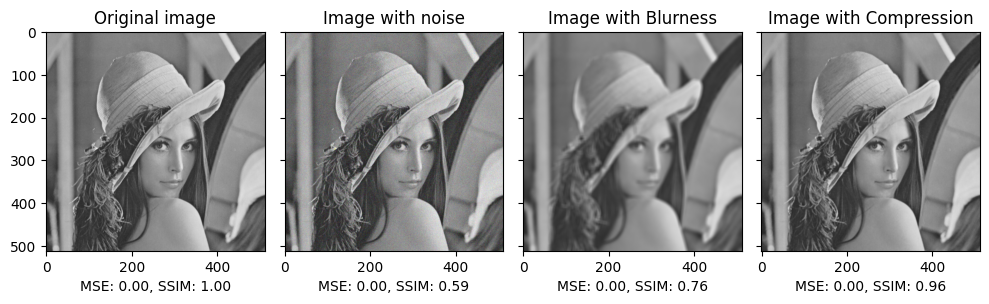

In [ ]:
fig, axes = matplotlib.pyplot.subplots(nrows=1, ncols=4, figsize=(10, 6),
                         sharex=True, sharey=True)
ax = axes.ravel()
#original Image
mse_Original = cal_MSE(Original_image, Original_image)
ssim_Original = cal_SSIM_Index(Original_image, Original_image)

#niosy Image
mse_noisy_img = cal_MSE(Original_image, Noisy_I)
ssim_noisy_img = cal_SSIM_Index(Original_image, Noisy_I)

#Blur Image
mse_Blur_img = cal_MSE(Original_image, Blur_img)
ssim_Blur_img = cal_SSIM_Index(Original_image, Blur_img)

#Compressed Image
mse_Com_img = cal_MSE(Original_image, com_img)
ssim_Com_img = cal_SSIM_Index(Original_image, com_img)

ax[0].imshow(Original_image, cmap=matplotlib.pyplot.cm.gray, vmin=0, vmax=1)
ax[0].set_xlabel(f'MSE: {mse_Original:.2f}, SSIM: {ssim_Original:.2f}')
ax[0].set_title('Original image')

ax[1].imshow(Noisy_I, cmap=matplotlib.pyplot.cm.gray, vmin=0, vmax=1)
ax[1].set_xlabel(f'MSE: {mse_noisy_img:.2f}, SSIM: {ssim_noisy_img:.2f}')
ax[1].set_title('Image with noise')

ax[2].imshow(Blur_img, cmap=matplotlib.pyplot.cm.gray, vmin=0, vmax=1)
ax[2].set_xlabel(f'MSE: {mse_Blur_img:.2f}, SSIM: {ssim_Blur_img:.2f}')
ax[2].set_title('Image with Blurness')

ax[3].imshow(com_img, cmap=matplotlib.pyplot.cm.gray, vmin=0, vmax=1)
ax[3].set_xlabel(f'MSE: {mse_Com_img:.2f}, SSIM: {ssim_Com_img:.2f}')
ax[3].set_title('Image with Compression')


matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

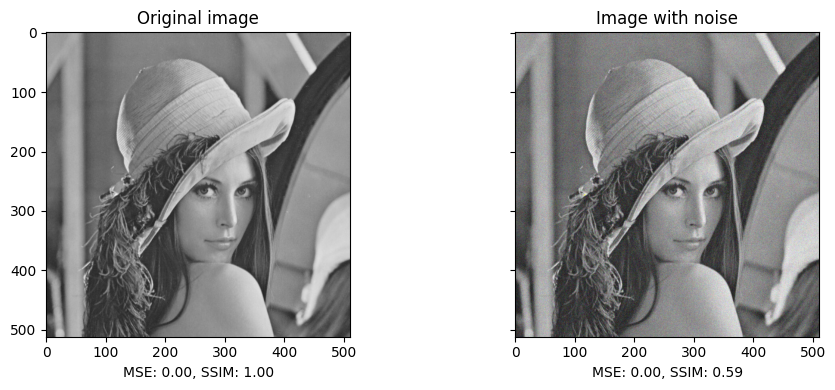

In [ ]:
fig, axes = matplotlib.pyplot.subplots(nrows=1, ncols=2, figsize=(10, 4),
                         sharex=True, sharey=True)
ax = axes.ravel()
#original Image
mse_Original = cal_MSE(Original_image, Original_image)
ssim_Original = cal_SSIM_Index(Original_image, Original_image)

#niosy Image
mse_noisy_img = cal_MSE(Original_image, Noisy_I)
ssim_noisy_img = cal_SSIM_Index(Original_image, Noisy_I)



ax[0].imshow(Original_image, cmap=matplotlib.pyplot.cm.gray, vmin=0, vmax=1)
ax[0].set_xlabel(f'MSE: {mse_Original:.2f}, SSIM: {ssim_Original:.2f}')
ax[0].set_title('Original image')

ax[1].imshow(Noisy_I, cmap=matplotlib.pyplot.cm.gray, vmin=0, vmax=1)
ax[1].set_xlabel(f'MSE: {mse_noisy_img:.2f}, SSIM: {ssim_noisy_img:.2f}')
ax[1].set_title('Image with noise')


matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

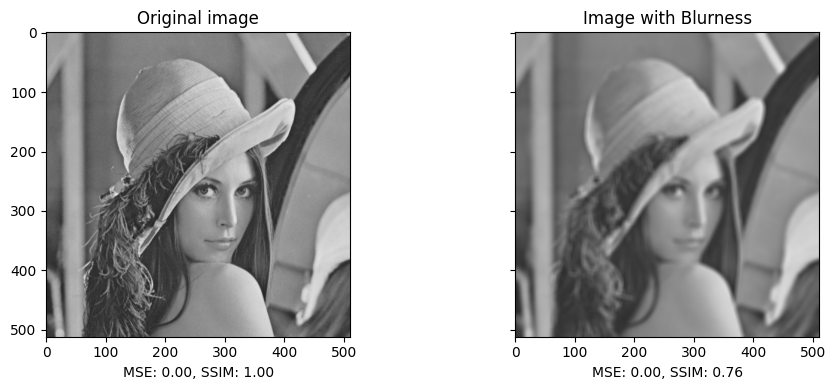

In [ ]:
fig, axes = matplotlib.pyplot.subplots(nrows=1, ncols=2, figsize=(10, 4),
                         sharex=True, sharey=True)
ax = axes.ravel()
#original Image
mse_Original = cal_MSE(Original_image, Original_image)
ssim_Original = cal_SSIM_Index(Original_image, Original_image)
#Blur Image
mse_Blur_img = cal_MSE(Original_image, Blur_img)
ssim_Blur_img = cal_SSIM_Index(Original_image, Blur_img)



ax[0].imshow(Original_image, cmap=matplotlib.pyplot.cm.gray, vmin=0, vmax=1)
ax[0].set_xlabel(f'MSE: {mse_Original:.2f}, SSIM: {ssim_Original:.2f}')
ax[0].set_title('Original image')

ax[1].imshow(Blur_img, cmap=matplotlib.pyplot.cm.gray, vmin=0, vmax=1)
ax[1].set_xlabel(f'MSE: {mse_Blur_img:.2f}, SSIM: {ssim_Blur_img:.2f}')
ax[1].set_title('Image with Blurness')

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

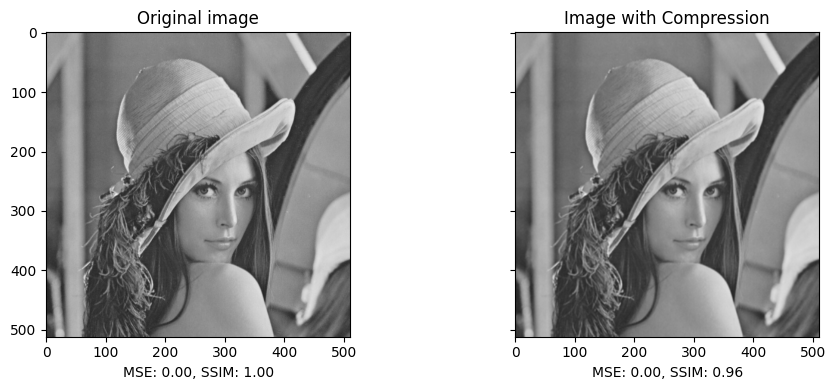

In [ ]:
fig, axes = matplotlib.pyplot.subplots(nrows=1, ncols=2, figsize=(10, 4),
                         sharex=True, sharey=True)
ax = axes.ravel()
#original Image
mse_Original = cal_MSE(Original_image, Original_image)
ssim_Original = cal_SSIM_Index(Original_image, Original_image)
#Compressed Image
mse_Com_img = cal_MSE(Original_image, com_img)
ssim_Com_img = cal_SSIM_Index(Original_image, com_img)



ax[0].imshow(Original_image, cmap=matplotlib.pyplot.cm.gray, vmin=0, vmax=1)
ax[0].set_xlabel(f'MSE: {mse_Original:.2f}, SSIM: {ssim_Original:.2f}')
ax[0].set_title('Original image')

ax[1].imshow(com_img, cmap=matplotlib.pyplot.cm.gray, vmin=0, vmax=1)
ax[1].set_xlabel(f'MSE: {mse_Com_img:.2f}, SSIM: {ssim_Com_img:.2f}')
ax[1].set_title('Image with Compression')

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()